Before you turn this problem in, make sure everything runs as expected. First, **restart the kernel** (in the menubar, select Kernel$\rightarrow$Restart) and then **run all cells** (in the menubar, select Cell$\rightarrow$Run All).

Make sure you fill in any place that says `YOUR CODE HERE` or "YOUR ANSWER HERE", as well as your name and collaborators below:

In [173]:
NAME = "Floris van der Heijden 2009790 u245966"
COLLABORATORS = "Noah Woerdman 2009606 u906467"

---

Fill in the cell above to provide us with your name and student number, like

NAME = "Adam Smith, #student number#"

where you replace "#student number#" with your ... (very good!)

and if you are doing this with someone else (not more than one other person):

COLLABORATORS = "Karl Marx, #student number#"

# exam June 7th, 2018



In the first cell of the notebook, give us your name and student number in the way indicated above. If you do this notebook with --at max.-- one other student, give her/his name and student number as well under "COLLABORATORS".

Fill in the notebook (see below for code cells and text cells that you need to fill in).

If you look at the menus above (File, Edit, View etc.), there is one called "Cell". If you click on this, you can change the "Cell Type". Choose "Code" when you are typing python or R code. Choose "Markdown" when you are typing, well, markdown.

When you finish the notebook, make sure that you **save it with the output of your code included**. 

Then put it on github, e.g. by dragging it onto github (see instructions below). 

Finally, add a link to your README file with the name of this exam: "Exam June 7, 2018".



## price effects of mergers

We consider a merger in this notebook. 

First we calculate the equilibrium with three firms, denoted by 1, 2 and 3. Then firms 2 and 3 merge so that we are left with 2 firms; denoted by 1 and 2.

We calculate the effects of the merger on the equilibrium price.

We start by importing the usual libraries.

In [174]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from scipy import optimize
%matplotlib inline

The following code helps to calculate the equilibrium for the case with 3 firms. Note that you have seen similar code during the tutorials to calculate the equilibrium with 2 firms.

We assume that before the merger each firm has constant marginal costs equal to 0.3. We assume a simple linear (inverse) demand curve of the form $p=1-Q$ where $p$ denotes price and $Q$ total output on the market. Total output equals the sum of each firm's output: $Q= q_1 + q_2+q_3$.

In [175]:
c0 = 0.3
vector_c = [c0]*3

def p(Q):
    return 1 - Q

def costs(q,c):
    return c*q

def profits(q,Q_other,c):
    return p(q+Q_other)*q-costs(q,c)

def reaction(Q_other,c):
    q1 =  optimize.fminbound(lambda x: -profits(x,Q_other,c),0,1,full_output=1)
    return q1[0]

def fixed_point_three_firms(vector_q,vector_c):
    return [vector_q[0]-reaction(vector_q[1]+vector_q[2],vector_c[0]),
            vector_q[1]-reaction(vector_q[0]+vector_q[2],vector_c[1]),
            vector_q[2]-reaction(vector_q[0]+vector_q[1],vector_c[2])]



#### a) [0.5 points] Show that total equilibrium output equals  0.525. Derive the equilibrium price and Herfindahl index; denote these by `P0` and `H0` resp.

first we created the starting point at an output of 0 for all firms. then we solved and optimized the model to find at which points the firms wouldnt change their outputs anymore. from these outputs we calculated the total output, price and Herfindahl index.

In [176]:
starting_point = [0,0,0]
output_vector_firms = optimize.fsolve(lambda q: fixed_point_three_firms(q,[0.3,0.3,0.3]), starting_point)
print("output vector equals: " + str(output_vector_firms))
equilibrium_output = sum(output_vector_firms)
print("equilibrium output equals(Q0): " + str(equilibrium_output))
print("equilibrium price equals(P0): " + str(p(equilibrium_output)))
market_share = output_vector_firms / equilibrium_output
herfindahl_index = sum(market_share**2)
print("Herfindahl index equals: " + str(herfindahl_index))
print("rounded Herfindahl index equals(H0): "+ str(round(herfindahl_index,4)))

output vector equals: [0.175 0.175 0.175]
equilibrium output equals(Q0): 0.525
equilibrium price equals(P0): 0.475
Herfindahl index equals: 0.3333333333333333
rounded Herfindahl index equals(H0): 0.3333


#### b) [0.5 point] Define a function `fixed_point_two_firms` with the same structure as the function `fixed_point_three_firms` above, except that it derives the equilibrium output levels for a duopoly (two firms). Test this function by showing that each of the two firms produces 0.3333 in case both firms have zero costs.

we used the model from 1a and changed the cost from 0.3 to 0. then we altered the fixed_point so that this would only depend on firm 0 and firm 1. then again solving it to check if the outputs equalled 0.3333.

In [177]:
c0 = 0
vector_c = [c0]*2

def p(Q):
    return 1 - Q

def costs(q,c):
    return c*q

def profits(q,Q_other,c):
    return p(q+Q_other)*q-costs(q,c)

def reaction(Q_other,c):
    q1 =  optimize.fminbound(lambda x: -profits(x,Q_other,c),0,1,full_output=1)
    return q1[0]

def fixed_point_two_firms(vector_q,vector_c):
    return [vector_q[0]-reaction(vector_q[1],vector_c[0]),
            vector_q[1]-reaction(vector_q[0],vector_c[1])]

starting_point = [0,0]
output_vector_firms = optimize.fsolve(lambda q: fixed_point_two_firms(q,[0,0]), starting_point)
print("output vector equals: " + str(output_vector_firms))

output vector equals: [0.33333333 0.33333333]


The Dutch competition authority, ACM, is asked to evaluate the effects of a merger between firms 2 and 3. Firms 2 and 3 claim that by merging they can reduce their constant marginal costs. But it is not clear by how much they will reduce their costs.

The ACM assumes that the marginal cost level of the merged firm is uniformly distributed between 0 and the current marginal cost level `c0`. The merger will not affect the marginal cost level of firm 1 who does not merge. Firm 1's cost level remains `c0`.

The next cell generates a vector of cost levels for the merged firm, denoted `c_after_merger`. Evaluate "c_after_merger" in a separate cell if you do not understand the command that defines it.

Then it calculates the equilibrium output levels for (the non-merging) firm 1 and (the merged) firm 2.

Note that you need to specify `initial_guess`.


In [178]:
c_after_merger = np.random.uniform(0,c0,size = 100)

q1_after_merger = [optimize.fsolve(lambda q: fixed_point_two_firms(q,[c0,c]), initial_guess)[0] for c in c_after_merger]
q2_after_merger = [optimize.fsolve(lambda q: fixed_point_two_firms(q,[c0,c]), initial_guess)[1] for c in c_after_merger]




#### c) [0.5 points] Create a dataframe called `df_after_merger` with three columns: `c_merged_firm`, `output_non_merging_firm`, `output_merged_firm` containing resp. the cost level of the merged firm, the output level of firm 1 and the output level of firm 2.

first we copied the model from above. then we created 100 random points between 0 and 0.3 for the marginal cost of the merged firm. then we used the model to calculate the outputs of both firms with their given costs. then we put these lists in a dataframe with according column names.

In [179]:
c0=0.3
c_after_merger = np.random.uniform(0,c0,size = 100)
initial_guess=[0,0]
q1_after_merger = [optimize.fsolve(lambda q: fixed_point_two_firms(q,[c0,c]), initial_guess)[0] for c in c_after_merger]
q2_after_merger = [optimize.fsolve(lambda q: fixed_point_two_firms(q,[c0,c]), initial_guess)[1] for c in c_after_merger]
c_merged_firm = c_after_merger
output_non_merging_firm = q1_after_merger
output_merged_firm = q2_after_merger
data = {'c_merged_firm':c_merged_firm,'output_non_merging_firm':output_non_merging_firm,'output_merged_firm':output_merged_firm}
df_after_merger = pd.DataFrame(data)
print(df_after_merger)


    c_merged_firm  output_merged_firm  output_non_merging_firm
0        0.251090            0.265940                 0.217030
1        0.245362            0.269758                 0.215121
2        0.095658            0.369561                 0.165219
3        0.223392            0.284405                 0.207797
4        0.069507            0.386996                 0.156502
5        0.253152            0.264565                 0.217717
6        0.085105            0.376596                 0.161702
7        0.286891            0.242073                 0.228964
8        0.291517            0.238989                 0.230506
9        0.062252            0.391832                 0.154084
10       0.010083            0.426611                 0.136694
11       0.191303            0.305798                 0.197101
12       0.105474            0.363018                 0.168491
13       0.282891            0.244740                 0.227630
14       0.121051            0.352633                 0

#### d) [0.5 points] Add three columns to the dataframe with resp. total equilibrium output on the market, `Q`, equilibrium price, `P` and the Herfindahl index, `H`.

we put the lists from 1c in numpy arrays to be able to divide them as list/list isn't possible but array/array is. the we used these arrays to calculate the total output, price(for this we also created an array which has 100 entries of 1) and Herfindahl index and then created a dataframe.

In [180]:
qmf= np.array(output_merged_firm)
qnmf= np.array(output_non_merging_firm)
Q = qmf+qnmf
Qnp= np.array(Q)
H = ((qmf/Qnp)**2)+((qnmf/Qnp)**2)
P = (100*[1]) - Qnp
data = {'c_merged_firm':c_merged_firm,'output_non_merging_firm':output_non_merging_firm,'output_merged_firm':output_merged_firm, 'Q':Q, 'H':H, 'P':P}
df_after_merger = pd.DataFrame(data)
print(df_after_merger)


           H         P         Q  c_merged_firm  output_merged_firm  \
0   0.505128  0.517030  0.482970       0.251090            0.265940   
1   0.506349  0.515121  0.484879       0.245362            0.269758   
2   0.573002  0.465219  0.534781       0.095658            0.369561   
3   0.512112  0.507797  0.492203       0.223392            0.284405   
4   0.589927  0.456502  0.543498       0.069507            0.386996   
5   0.504718  0.517717  0.482283       0.253152            0.264565   
6   0.579685  0.461702  0.538298       0.085105            0.376596   
7   0.500387  0.528964  0.471036       0.286891            0.242073   
8   0.500163  0.530506  0.469494       0.291517            0.238989   
9   0.594831  0.454084  0.545916       0.062252            0.391832   
10  0.632443  0.436694  0.563306       0.010083            0.426611   
11  0.523359  0.497101  0.502899       0.191303            0.305798   
12  0.566974  0.468491  0.531509       0.105474            0.363018   
13  0.

#### e) [0.5 points] Make a histogram of the equilibrium price `P` after the merger. Also indicate in the histogram the equilibrium price before the merger `P0`. Label the horizontal axis with $P$.

[hint: you may want to use matplotlib's `hist`, `vlines` and `legend` to make this graph (e.g use google to find these functions); but feel free to use something else]

we plotted a histogram of P after the merger with a vertical line P0 with a legend

Text(0,0.5,'Number of observations')

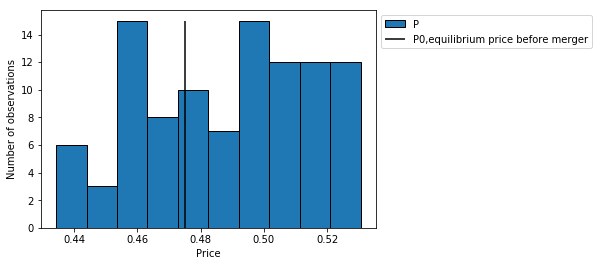

In [183]:
plt.hist(P,edgecolor='black', label = 'P')
plt.vlines(p(equilibrium_output),ymin=0,ymax=15,label = 'P0,equilibrium price before merger')
plt.legend(bbox_to_anchor=(1, 1))
plt.xlabel('Price')
plt.ylabel('Number of observations')


#### f) [0.5 points] Explain why sometimes the equilibrium price after the merger exceeds the equilibrium price before the merger and sometimes it is lower than the pre-merger price. [hint: there is a trade off between two effects, depending on which effect dominates, equilibrium price increases or decreases after the merger]

the trade off is between the decrease in marginal costs and the increase in q per firm due to going from 3 firms total to 2 firms total. if the decrease in marginal costs is small the quantity effect is bigger so total quantity drops and prices will go up. if the decrease in marginal costs is large the quantity effect is smaller so total quantity rises and prices will go down.


#### g) [0.5 points] Make a graph with the Herfindahl index on the horizontal axis and the equilibrium price on the vertical axis. This is straightforward for $(H,P)$ after the merger as both values are in the dataframe. Add in another color, the pre-merger combination `(H0,P0)` that we calculated above.

we created a scatterplot with the combinations of H,P and H0,P0.

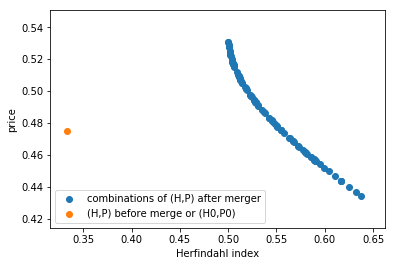

In [182]:
plt.scatter(H,P, label="combinations of (H,P) after merger")
plt.scatter(herfindahl_index,p(equilibrium_output), label="(H,P) before merge or (H0,P0)")
plt.xlabel('Herfindahl index')
plt.ylabel('price')
plt.legend()

#### h) [0.5 points] Use the graph under g) to discuss the relation between the Herfindahl index and the equilibrium price. To illustrate, some people think that lower values of the Herfindahl index are associated with more competitive outcome. Would you agree with this?

The more firms the lower the Herfindahl index. so from this we could conclude that a lower herfindahl index means more competitiveness. however when the amount of firms is fixed a lower Herfindahl index means a higher price, which would suggest less competitiveness.

## Github

After you have finished, we need to upload this notebook on github. Make sure that you upload the file on the github page of each collaborator.

Instructions on how to upload this on github can be found [on this page](http://janboone.github.io/programming-for-economists/github.html). This page has two screencasts: one shows how to drag the notebook onto your github page, the other shows how you can use the command line to upload your notebook.


Remember to update the README file in your repository to include a link to this notebook on github.


The links that you should post start with “github.com/” and are NOT of the form “http://localhost”. Make sure you test your links after uploading.